<a href="https://colab.research.google.com/github/emilyperras/ECON5200-Applied-Data-Analytics-in-Economics/blob/main/_lab_2_deflating_history_with_fred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install the FRED API library
!pip install fredapi

In [ ]:
# Import the standard libraries

import pandas as pd
from fredapi import Fred


# Authenticate
# Replace the string below with YOUR unique API key from fred.stlouisfed.org
fred = Fred(api_key='34a16ec4d015768d872e3615629ba0f3')


In [ ]:
# 1. Fetch the data series
print("Fetching data from FRED...")
wages = fred.get_series('AHETPI')
cpi = fred.get_series('CPIAUCSL')

# 2. Combine into a DataFrame         putting the
df = pd.DataFrame({'Nominal_Wage': wages, 'CPI': cpi})

# 3. Drop missing values (The wage data starts later than CPI data)
df = df.dropna()

# Inspect the raw data
print(df.head())
print(df.tail())

Fetching data from FRED...
            Nominal_Wage    CPI
1964-01-01          2.50  30.94
1964-02-01          2.50  30.91
1964-03-01          2.51  30.94
1964-04-01          2.52  30.95
1964-05-01          2.52  30.98
            Nominal_Wage      CPI
2025-07-01         31.35  322.132
2025-08-01         31.45  323.364
2025-09-01         31.52  324.368
2025-11-01         31.73  325.031
2025-12-01         31.76  326.030


In [ ]:


# Apply the function to create a new column
# We feed the "Machine" our two columns:

df['Real_wage'] = get_real_wage(df['Nominal_Wage'], df['CPI'])

# Check the result - Notice how Real Wages are different from Nominal!
print(df.head())
print(df.tail())

            Nominal_Wage    CPI  Real_wage
1964-01-01          2.50  30.94  26.343730
1964-02-01          2.50  30.91  26.369298
1964-03-01          2.51  30.94  26.449105
1964-04-01          2.52  30.95  26.545900
1964-05-01          2.52  30.98  26.520194
            Nominal_Wage      CPI  Real_wage
2025-07-01         31.35  322.132  31.729355
2025-08-01         31.45  323.364  31.709292
2025-09-01         31.52  324.368  31.681502
2025-11-01         31.73  325.031  31.827524
2025-12-01         31.76  326.030  31.760000


In [ ]:
def get_real_wage(nominal_col, cpi_col):
    """
    Takes a nominal column and a CPI column.
    Returns a new column adjusted for inflation (Real Dollars).
    """
    # 1. Get the CPI of the most recent date (Today's Prices)
    # .iloc[-1] grabs the very last row in the data
    cpi_today = cpi_col.iloc[-1]

    # 2. The Formula: (Nominal / Old_CPI) * CPI_Today
    real_col = (nominal_col / cpi_col) * cpi_today

    return real_col

# Apply the function to create a new column
# We feed the "Machine" our two columns:
df['Real_Wage'] = get_real_wage(df['Nominal_Wage'], df['CPI'])

# Check the result - Notice how Real Wages are different from Nominal!
print(df.tail())


            Nominal_Wage      CPI  Real_wage  Real_Wage
2025-07-01         31.35  322.132  31.729355  31.729355
2025-08-01         31.45  323.364  31.709292  31.709292
2025-09-01         31.52  324.368  31.681502  31.681502
2025-11-01         31.73  325.031  31.827524  31.827524
2025-12-01         31.76  326.030  31.760000  31.760000


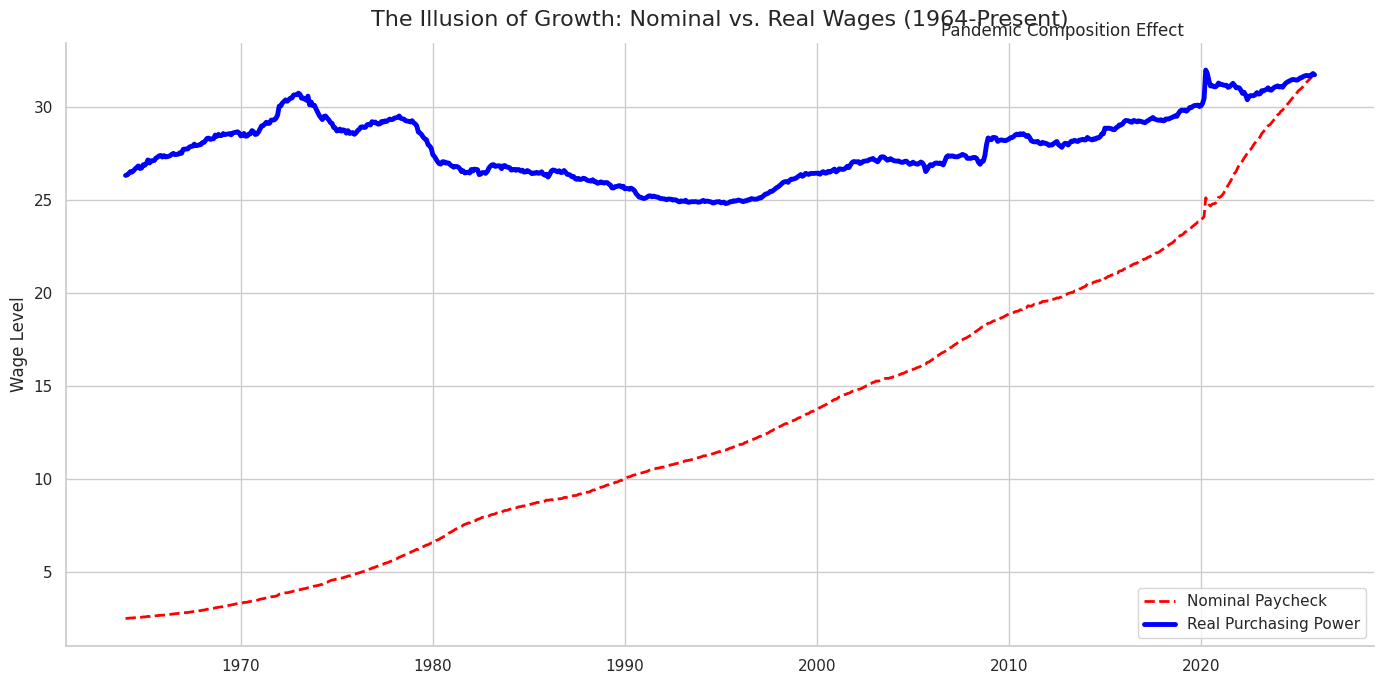

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# --- Style / theme ---
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(14, 7))

# --- Plot lines ---
ax.plot(
    df.index, df["Nominal_Wage"],
    linestyle="--", linewidth=2, color="red",
    label="Nominal Paycheck"
)

ax.plot(
    df.index, df["Real_Wage"],
    linestyle="-", linewidth=3.5, color="blue",
    label="Real Purchasing Power"
)

# --- Titles / labels ---
ax.set_title("The Illusion of Growth: Nominal vs. Real Wages (1964-Present)", fontsize=16, pad=12)
ax.set_xlabel("")
ax.set_ylabel("Wage Level")

# --- Annotation: 2020 spike in real wages ---
# Find the peak in real wages during 2020 (robust even if index isn't exactly on a single date)
df_2020 = df.loc["2020-01-01":"2020-12-31"]
if not df_2020.empty:
    spike_date = df_2020["Real_Wage"].idxmax()
    spike_val = df_2020.loc[spike_date, "Real_Wage"]

    ax.annotate(
        "Pandemic Composition Effect",
        xy=(spike_date, spike_val),
        xytext=(spike_date - pd.DateOffset(months=14), spike_val * 1.05),
        arrowprops=dict(arrowstyle="->", lw=1.5),
        fontsize=12,
        ha="right",
        va="bottom"
    )

# --- Legend / finishing touches ---
ax.legend(frameon=True)
sns.despine()
plt.tight_layout()
plt.show()


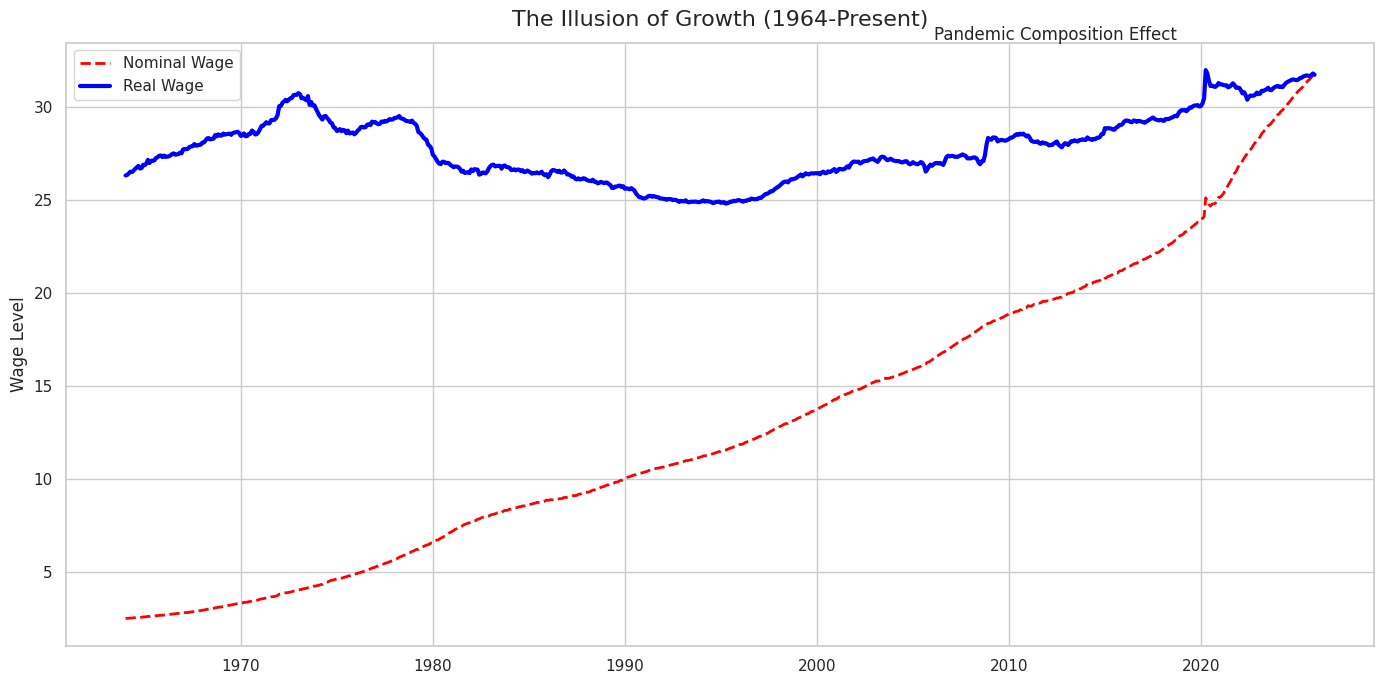

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Create figure
fig, ax = plt.subplots(figsize=(14, 7))

# Plot nominal and real wages
ax.plot(
    df.index,
    df["Nominal_Wage"],
    linestyle="--",
    color="red",
    linewidth=2,
    label="Nominal Wage"
)

ax.plot(
    df.index,
    df["Real_Wage"],
    linestyle="-",
    color="blue",
    linewidth=3,
    label="Real Wage"
)

# Title and labels
ax.set_title("The Illusion of Growth (1964-Present)", fontsize=16, pad=12)
ax.set_ylabel("Wage Level")
ax.set_xlabel("")

# Find and annotate the 2020 spike in real wages
df_2020 = df.loc["2020-01-01":"2020-12-31"]
if not df_2020.empty:
    spike_date = df_2020["Real_Wage"].idxmax()
    spike_value = df_2020.loc[spike_date, "Real_Wage"]

    ax.annotate(
        "Pandemic Composition Effect",
        xy=(spike_date, spike_value),
        xytext=(spike_date - pd.DateOffset(months=18), spike_value * 1.05),
        arrowprops=dict(arrowstyle="->", linewidth=1.5),
        fontsize=12,
        ha="right"
    )

# Legend and layout
ax.legend()
plt.tight_layout()
plt.show()


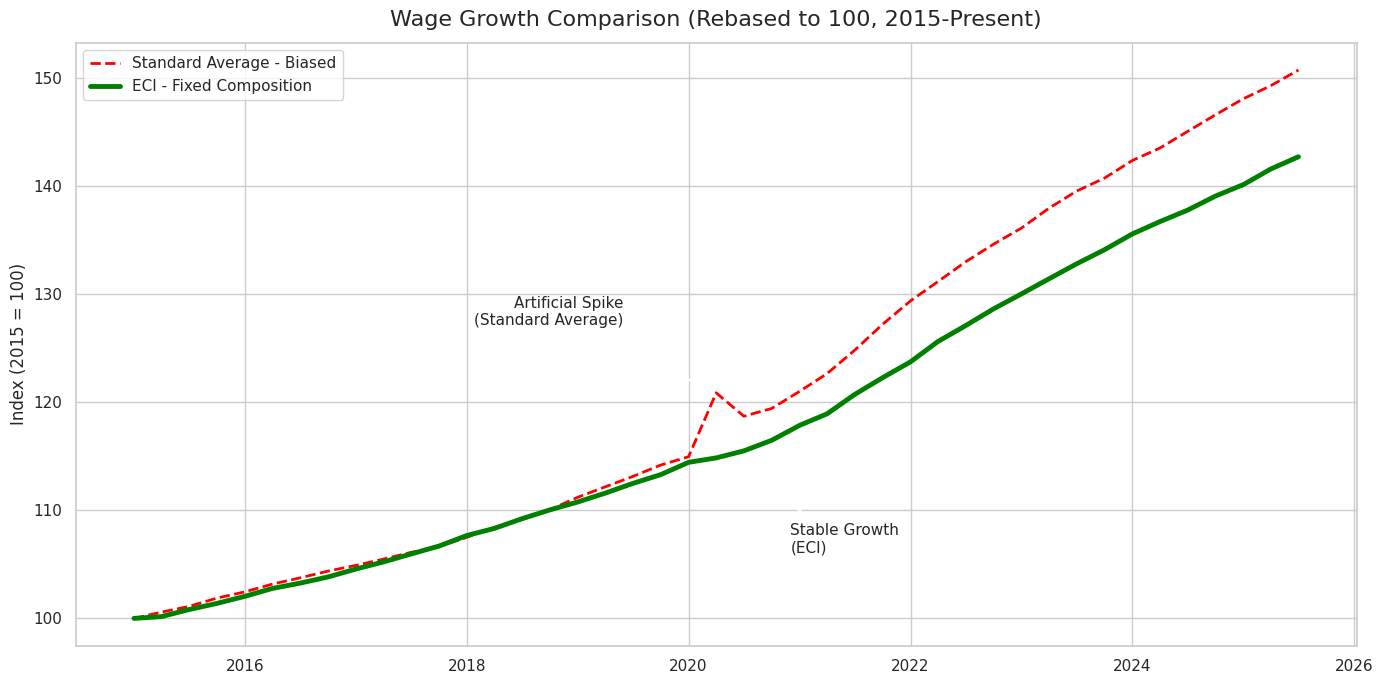

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1) Fetch ECI (fixed-composition wage index) from FRED
eci = fred.get_series("ECIWAG")
eci.index = pd.to_datetime(eci.index)

# Ensure wages has a DatetimeIndex too
wages = wages.copy()
wages.index = pd.to_datetime(wages.index)

# 2) Filter both to 2015-01-01 onward
start = "2015-01-01"
w = wages.loc[start:].dropna()
e = eci.loc[start:].dropna()

# Align to common dates (important if frequencies differ)
w, e = w.align(e, join="inner")

# 3) Rebase both to 100
w_idx = (w / w.iloc[0]) * 100
e_idx = (e / e.iloc[0]) * 100

# 4) Plot
fig, ax = plt.subplots(figsize=(14, 7))

ax.plot(w_idx.index, w_idx, linestyle="--", linewidth=2, color="red",
        label="Standard Average - Biased")
ax.plot(e_idx.index, e_idx, linestyle="-", linewidth=3.5, color="green",
        label="ECI - Fixed Composition")

ax.set_title("Wage Growth Comparison (Rebased to 100, 2015-Present)", fontsize=16, pad=12)
ax.set_ylabel("Index (2015 = 100)")
ax.set_xlabel("")
ax.legend()

# 5) Annotate divergence in 2020
w_2020 = w_idx.loc["2020-01-01":"2020-12-31"]
e_2020 = e_idx.loc["2020-01-01":"2020-12-31"]

if (not w_2020.empty) and (not e_2020.empty):
    # Use the date where the gap between the two series is largest in 2020
    gap_2020 = (w_2020 - e_2020).abs()
    d = gap_2020.idxmax()

    ax.annotate(
        "Artificial Spike\n(Standard Average)",
        xy=(d, w_idx.loc[d]),
        xytext=(d - pd.DateOffset(months=10), w_idx.loc[d] + 6),
        arrowprops=dict(arrowstyle="->", linewidth=1.5),
        fontsize=11,
        ha="right",
        va="bottom"
    )

    ax.annotate(
        "Stable Growth\n(ECI)",
        xy=(d, e_idx.loc[d]),
        xytext=(d + pd.DateOffset(months=8), e_idx.loc[d] - 6),
        arrowprops=dict(arrowstyle="->", linewidth=1.5),
        fontsize=11,
        ha="left",
        va="top"
    )

plt.tight_layout()
plt.show()
